In [197]:
import pandas as pd
from matplotlib import pyplot
import seaborn as sns
from pandas.plotting import scatter_matrix
import math
import seaborn as sns
import numpy as np

In [198]:
def average_calculator(a,b):
    if a == 0 or b == 0:
        return 0
    else:
        b_a = abs((a-b)/b)/100
        a_b = abs((b-a)/a)
        return (b_a,a_b)

First will be your notebook jupyter with your calculation You will have to implement multiple functions:

In [199]:
#load_dataset()

def load_dataset(dataset):
    dataset = pd.read_csv("googleplaystore.csv",index_col=None,names=["App","Category","Rating","Reviews","Size","Installs","Type","Price","Content_Rating","Genres","Last_Updated","Current_Version","Android_Version"])
    dataset = dataset.drop(index=0)
    return dataset

source = "googleplaystore.csv"
raw_dataset = load_dataset(source)
raw_dataset.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Version,Android_Version
1,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
3,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
5,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [200]:
#print_summarize_dataset
def print_summarize_dataset(dataset):
    print(f"Describe Dataset:\n {dataset.describe()}\n")
    print(f"Dataset Information:\n {dataset.info()}\n")
    print(f"Dataset Count distinct:\n {dataset.nunique()}\n")

print_summarize_dataset(raw_dataset)

Describe Dataset:
            App Category Rating Reviews                Size    Installs   Type  \
count    10841    10841   9367   10841               10841       10841  10840   
unique    9660       34     40    6002                 462          22      3   
top     ROBLOX   FAMILY    4.4       0  Varies with device  1,000,000+   Free   
freq         9     1972   1109     596                1695        1579  10039   

        Price Content_Rating Genres    Last_Updated     Current_Version  \
count   10841          10840  10841           10841               10833   
unique     93              6    120            1378                2832   
top         0       Everyone  Tools  August 3, 2018  Varies with device   
freq    10040           8714    842             326                1459   

       Android_Version  
count            10838  
unique              33  
top         4.1 and up  
freq              2451  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 1 to 108

In [201]:
#Show the unique values per columns
def unique_values(df):
    cat = df['Category'].unique()
    type = df['Type'].unique()
    com_rat = df['Content_Rating'].unique()
    df[['Genres1','Genres2']] = df['Genres'].str.split(';',1,expand=True)
    genr1 = df['Genres1'].unique()
    genr2 = df['Genres2'].unique()
    return cat, type, com_rat, genr1, genr2

unique_labels = unique_values(raw_dataset)
unique_labels

(array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
        'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
        'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
        'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
        'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
        'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
        'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
        'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
        '1.9'], dtype=object),
 array(['Free', 'Paid', nan, '0'], dtype=object),
 array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
        'Adults only 18+', 'Unrated', nan], dtype=object),
 array(['Art & Design', 'Auto & Vehicles', 'Beauty', 'Books & Reference',
        'Business', 'Comics', 'Communication', 'Dating', 'Education',
        'Entertainment', 'Events', 'Finance', 'Food & Drink',
        'Health & Fitness', 'House & Home

In [202]:
#Create unified numeric assignment to find corelations
def label_numerate(dataset):
    dataset['Category_Num'] = dataset['Category'].astype('category')
    dataset['Category_Num'] = dataset['Category_Num'].cat.codes
    dataset['Type_Num'] = dataset['Type'].astype('category')
    dataset['Type_Num'] = dataset['Type_Num'].cat.codes
    dataset['Content_Rating_Num'] = dataset['Type'].astype('category')
    dataset['Content_Rating_Num'] = dataset['Content_Rating_Num'].cat.codes
    dataset['Genres1_Num'] = dataset['Genres1'].astype('category')
    dataset['Genres1_Num'] = dataset['Genres1_Num'].cat.codes
    dataset['Genres2_Num'] = dataset['Genres2'].astype('category')
    dataset['Genres2_Num'] = dataset['Genres2_Num'].cat.codes
    return dataset

enumerated_dataset = label_numerate(raw_dataset)
enumerated_dataset

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Version,Android_Version,Genres1,Genres2,Category_Num,Type_Num,Content_Rating_Num,Genres1_Num,Genres2_Num
1,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,Art & Design,None,1,1,1,3,-1
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,Art & Design,Pretend Play,1,1,1,3,5
3,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,Art & Design,None,1,1,1,3,-1
4,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,Art & Design,None,1,1,1,3,-1
5,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,Art & Design,Creativity,1,1,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10837,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,Education,None,12,1,1,15,-1
10838,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,Education,None,12,1,1,15,-1
10839,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up,Medical,None,21,1,1,27,-1
10840,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,Books & Reference,None,4,1,1,7,-1


Analysis of the dataset - cleaning, summary, basic information

In [209]:
#clean the dataset for assessment: corelations - leaving only int in the dataframe
#keep: Rating, Reviews, Size, Installs, Price
#clean_dataset

def clean_dataset(df_in):
    df = df_in
    #clean int fields from unvanted chars
    df['Size'] = df['Size'].replace({'\D+':'0'},regex=True)
    df['Installs'] = df['Installs'].replace({'\D+':'0'},regex=True)
    df['Reviews'] = df['Reviews'].replace({'\D+':'0'},regex=True)
    df['Price'] = df['Price'].replace({'\D+':'0'},regex=True)
    df = df.astype({'Reviews':'int','Size':'int','Installs':'int64','Price':'int'})
    df['Installs'] = df['Installs']

    #Remove duplicated apps
    #df = df.drop_duplicates(subset=['App'])

    #change number categories to int
    df['Category_Num'] = df['Category_Num'].astype('int')
    df['Type_Num'] = df['Type_Num'].astype('int')
    df['Content_Rating_Num'] = df['Content_Rating_Num'].astype('int')
    df['Genres1_Num'] = df['Genres1_Num'].astype('int')
    df['Genres2_Num'] = df['Genres2_Num'].astype('int')

    #re-order the columns
    df = df[['Category_Num','Category','Type_Num','Type','Genres1_Num','Genres2_Num','Genres1','Genres2','App','Price','Installs','Rating','Reviews','Content_Rating_Num','Content_Rating','Last_Updated']]

    #focus only on payable applications
    df = df.query("Price > 0")

    return df

dataset_clean = clean_dataset(raw_dataset)
dataset_clean.head(10)
#dataset_clean.dtypes

,Category_Num,Category,Type_Num,Type,Genres1_Num,Genres2_Num,Genres1,Genres2,App,Price,Installs,Rating,Reviews,Content_Rating_Num,Content_Rating,Last_Updated
235,5,BUSINESS,2,Paid,8,-1,Business,None,TurboScan: scan documents and receipts in PDF,4099,10000000,4.7,11442,2,Everyone,"March 25, 2018"
236,5,BUSINESS,2,Paid,8,-1,Business,None,Tiny Scanner Pro: PDF Doc Scan,4099,10000000,4.8,10295,2,Everyone,"April 11, 2017"
291,5,BUSINESS,2,Paid,8,-1,Business,None,TurboScan: scan documents and receipts in PDF,4099,10000000,4.7,11442,2,Everyone,"March 25, 2018"
292,5,BUSINESS,2,Paid,8,-1,Business,None,Tiny Scanner Pro: PDF Doc Scan,4099,10000000,4.8,10295,2,Everyone,"April 11, 2017"
428,7,COMMUNICATION,2,Paid,13,-1,Communication,None,Puffin Browser Pro,3099,10000000,4.0,18247,2,Everyone,"July 5, 2018"
477,8,DATING,2,Paid,14,-1,Dating,None,"Moco+ - Chat, Meet People",3099,1000000,4.2,1545,2,Mature 17+,"June 19, 2018"
478,8,DATING,2,Paid,14,-1,Dating,None,Calculator,6099,100000,2.6,57,2,Everyone,"October 25, 2017"
479,8,DATING,2,Paid,14,-1,Dating,None,Truth or Dare Pro,1049,500,NaN,0,2,Teen,"September 1, 2017"
480,8,DATING,2,Paid,14,-1,Dating,None,"Private Dating, Hide App- Blue for PrivacyHider",2099,1000,NaN,0,2,Everyone,"July 25, 2017"
481,8,DATING,2,Paid,14,-1,Dating,None,Ad Blocker for SayHi,3099,1000,NaN,4,2,Teen,"August 2, 2018"


In [204]:
#sum total market size, by price, 
def size_of_market(dataset_clean):
    print(f"Total market asset value: {(dataset_clean['Price'].sum()/1_000_000):0.2f} mn $")
    print(f"Total market sales value (quad): {(dataset_clean['Price'].sum()*dataset_clean['Installs'].sum()/1_000_000_000_000_000):0.2f} quad $")
    print(f"Total number of installs: {(dataset_clean['Installs'].sum()/1_000_000):0.2f}")
    dataset_clean_fam = dataset_clean.query("Category == 'FAMILY'")
    print(f"Family category asset value: {(dataset_clean_fam['Price'].sum()/1_000_000):0.2f} mn $")
    print(f"Family category sales value (quad): {(dataset_clean_fam['Price'].sum()*dataset_clean_fam['Installs'].sum()/1_000_000_000_000_000):0.2f} quad $")
    print(f"Family category of installs: {(dataset_clean_fam['Installs'].sum()/1_000_000):0.2f}")


size_of_market(dataset_clean)

Total market asset value: 10.50 mn $
Total market sales value (quad): 586.71 quad $
Total number of installs: 55892.72
Family category asset value: 2.28 mn $
Family category sales value (quad): 58.39 quad $
Family category of installs: 25626.66


In [205]:
def print_summarize_dataset(df):
    print(df.describe())

print_summarize_dataset(dataset_clean)

       Category_Num  Type_Num  Genres1_Num  Genres2_Num         Price  \
count     800.00000     800.0   800.000000   800.000000     800.00000   
mean       18.26375       2.0    24.977500    -0.643750   13121.33375   
std         7.76818       0.0    13.418348     1.257503   57190.64265   
min         1.00000       2.0     0.000000    -1.000000      99.00000   
25%        12.00000       2.0    15.000000    -1.000000    1049.00000   
50%        19.00000       2.0    27.000000    -1.000000    2099.00000   
75%        24.00000       2.0    35.000000    -1.000000    4099.00000   
max        33.00000       2.0    47.000000     5.000000  400000.00000   

           Installs       Reviews  Content_Rating_Num  
count  8.000000e+02  8.000000e+02               800.0  
mean   6.986590e+07  1.167331e+04                 2.0  
std    6.329849e+08  1.210643e+05                 0.0  
min    0.000000e+00  0.000000e+00                 2.0  
25%    1.000000e+03  7.000000e+00                 2.0  
50%   

In [217]:
#Print the total values by category in percentages
def cat_split(df_cl):
    df = df_cl.groupby(['Category']).sum()
    df['Category_Num'] = (df['Category_Num'].sum()/df_cl['Category_Num'].sum())*100
    #df['dwnl_price'] = df(['Price']).mean()/df_cl(['Installs']).mean()
    df['downl_perc'] = (df[['Installs']]/df_cl['Installs'].sum())*100
    df['downl_perc'] = round(df['downl_perc'],3)
    return df.sort_values(by=['Installs'], ascending=False)

cat_split(dataset_clean)

,Category_Num,Type_Num,Genres1_Num,Genres2_Num,Price,Installs,Reviews,Content_Rating_Num,downl_perc
Category,,,,,,,,,
FAMILY,100.0,382,4166,68,2278378,25626658140,6046530,382,45.850
GAME,100.0,166,542,-79,216830,18309819650,1591503,166,32.759
PERSONALIZATION,100.0,166,2656,-83,92796,4125447940,449657,166,7.381
PHOTOGRAPHY,100.0,44,726,-22,116921,3097807400,230654,44,5.542
TOOLS,100.0,156,3354,-78,204925,1072344410,171937,156,1.919
COMMUNICATION,100.0,54,351,-27,62314,1035820500,84214,54,1.853
SPORTS,100.0,48,984,-24,82000,1024308150,150635,48,1.833
LIFESTYLE,100.0,38,475,-19,2346587,1017901100,47422,38,1.821
PRODUCTIVITY,100.0,56,952,-28,229393,141110550,171721,56,0.252


Find the weighted rating for the apps:
rev_weight = sum(reviews)/100


In [206]:
#calculating a ratings & review index using the bayesian-average

def bayesian_avg(dataset_clean):
    tot_weight = sum(dataset_clean['Reviews'])/100
    dataset_clean['rev_weight'] = dataset_clean['Reviews']/tot_weight
    dataset_clean['weighted_rate'] = dataset_clean['rev_weight']*dataset_clean['Rating']
    return dataset_clean.sort_values(['weighted_rate'],ascending=False)

rate_rev_dataset = bayesian_avg(dataset_clean)
rate_rev_dataset.head(5)


TypeError: can't multiply sequence by non-int of type 'float'

In [ ]:
#Calculate averages: installs / reviews; 
def average_inst_rev(dataset_clean_n):
    #dataset_clean['Reviews'] = dataset_clean['Reviews'] + 1
    #dataset_clean_n['Reviews'] = a
    #dataset_clean_n['Installs'] = b
    temp_dataset = dataset_clean_n
    dataset_clean_n = temp_dataset.dropna()
    dataset_clean['inst_rev'] = abs((dataset_clean_n['Reviews']-dataset_clean_n['Installs'])/dataset_clean_n['Installs'])/100
    dataset_clean['rev_inst'] = abs((dataset_clean_n['Installs']-dataset_clean_n['Reviews'])/dataset_clean_n['Reviews'])
    dataset_clean['users_engaged'] = 1-dataset_clean['rev_inst']
    #print(dataset_clean.dtypes)
    return dataset_clean

inst_rev_dataset = average_inst_rev(rate_rev_dataset)
inst_rev_dataset.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,rev_weight,weighted_rate,inst_rev,rev_inst,users_engaged
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6080,10000000,Paid,4099,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up,0.173468,0.815301,0.009989,872.973082,-871.973082
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,390,10000000,Paid,4099,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up,0.156079,0.749180,0.009990,970.345313,-969.345313
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,0,10000000,Paid,3099,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up,0.276637,1.106547,0.009982,547.035293,-546.035293
476,"Moco+ - Chat, Meet People",DATING,4.2,1545,0,1000000,Paid,3099,Mature 17+,Dating,"June 19, 2018",2.6.139,4.1 and up,0.023423,0.098378,0.009985,646.249191,-645.249191
477,Calculator,DATING,2.6,57,6020,100000,Paid,6099,Everyone,Dating,"October 25, 2017",1.1.6,4.0 and up,0.000864,0.002247,0.009994,1753.385965,-1752.385965


In [ ]:
#Installs / price incdex
def average_inst_pric(dataset_clean_m):
    dataset_clean['inst_pric'] = abs((dataset_clean_m['Price']-dataset_clean_m['Installs'])/dataset_clean_m['Installs'])/100
    dataset_clean['pric_inst'] = abs((dataset_clean_m['Installs']-dataset_clean_m['Price'])/dataset_clean_m['Price'])
    dataset_clean['value'] = 1-dataset_clean['pric_inst']
    dataset_clean['inst_pric'].apply(fix_zeroes)
    dataset_clean['pric_inst'].apply(fix_zeroes)
    dataset_clean['value'].apply(fix_zeroes)
    return dataset_clean


price_rev_dataset = average_inst_pric(inst_rev_dataset)
price_rev_dataset.head(5)

NameError: name 'fix_zeroes' is not defined

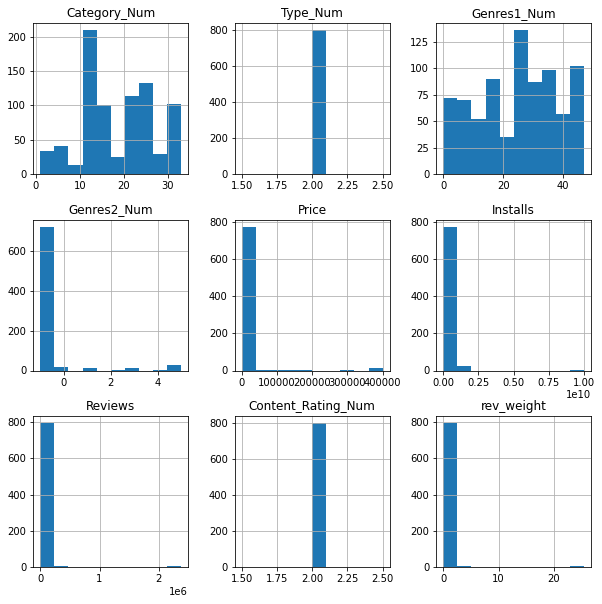

In [207]:
def print_histograms(df):
    df.hist(figsize=[10,10])
    pyplot.show()

print_histograms(dataset_clean)

{'Category_Num': -0.04118532903853088, 'Type_Num': nan, 'Genres1_Num': -0.117115201041636, 'Genres2_Num': 0.007118786118857741, 'Price': -0.018901730731456005, 'Installs': 1.0, 'Reviews': 0.8661406135722529, 'Content_Rating_Num': nan, 'rev_weight': 0.8661406135722515}


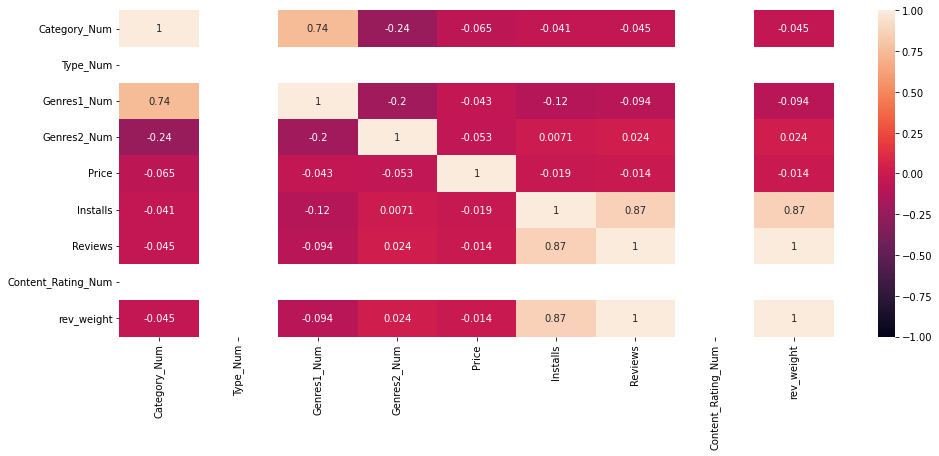

In [208]:
#calculate the pearsons correlation coeficient of the dataset:
def compute_correlations_matrix(df):    
    #df = df.query("Category == 'FAMILY'")
    corr_df = df.corr()
    #create a dictionarry from the coef table
    corelations = corr_df.to_dict(orient='dict')
    print(corelations['Installs'])
    pyplot.figure(figsize=(16, 6))
    sns.heatmap(corr_df, vmin=-1, vmax=1, annot=True)

compute_correlations_matrix(dataset_clean)

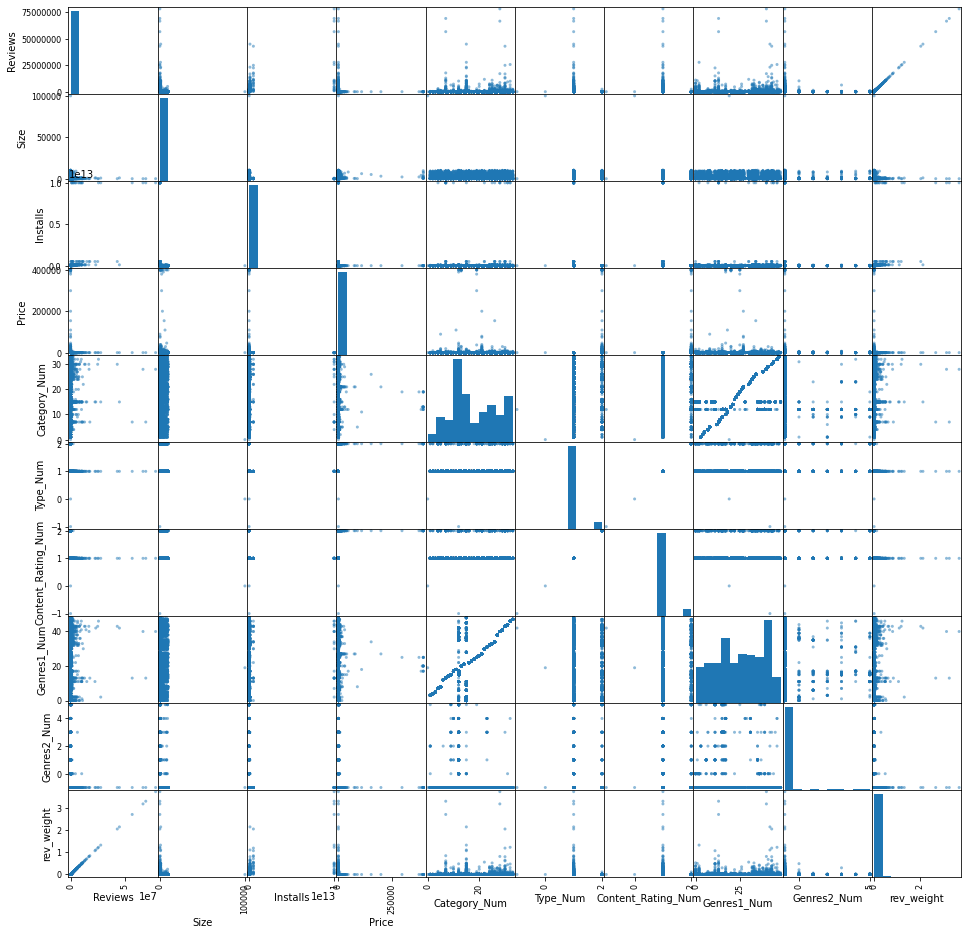

In [ ]:
def print_scatter_matrix(df):
    pd.plotting.scatter_matrix(df,figsize=([16,16]))

print_scatter_matrix(dataset_clean)

In [ ]:
#get unique values from the dataframe
print(dataset['Category'].unique())

['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']


[10000.  1000.  1000.  1000.    50.]
                             App  weighted_rate  Installs
2241                   Minecraft     162.136351   10000.0
9678           Where's My Water?      13.448696    1000.0
8860                 Bloons TD 5      13.256422    1000.0
2242  Card Wars - Adventure Time       8.448933    1000.0
6936                   Hitman GO       5.866033      50.0


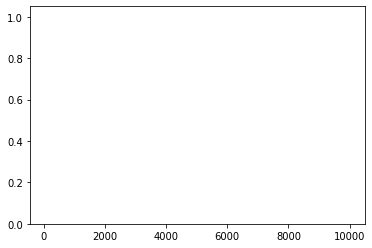

In [ ]:
#Plot with bar diagram the most populars paid apps of Family category
def popular_apps(dataset_clean):
    popular_apps = dataset_clean.query("Category == 'FAMILY'")
    #popular_apps = dataset_clean.query("Price > 0")
    popular_apps = popular_apps[['App','weighted_rate','Installs']]
    popular_apps_wght = popular_apps.sort_values(by=['weighted_rate'], ascending=False)
    popular_apps_inst = popular_apps.sort_values(by=['Installs'], ascending=False)
    popular_apps_wght_t10 = popular_apps_wght.head(5)
    popular_apps_inst_t10 = popular_apps_inst.head(5)
    x = np.array(popular_apps_wght_t10['Installs'])
    print(x)
    pyplot.bar(x, height=1)
    print(popular_apps_wght_t10)

popular_apps(dataset_clean)


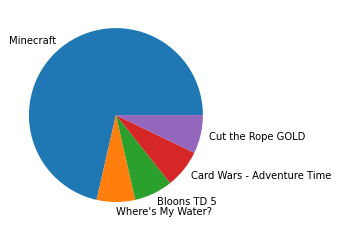

In [ ]:
#Plot with a pie diagram the most popular genres according to the number of installations from paid family

def popular_piechart(dataset_clean):
    pop_pie = dataset_clean.query("Category == 'FAMILY'")
    pop_pie = pop_pie[['App','Installs']]
    pop_pie = pop_pie.nlargest(n=5, columns=['Installs'])
    pyplot.pie(pop_pie['Installs'],labels=pop_pie['App'])

popular_piechart(dataset_clean)

In [ ]:
#Depending on each category, what are the ratio of download per app?: An array with the number of installation per category
def download_ratio(dataset_clean):
    dataset_sum = dataset_clean.groupby(['Category']).sum()
    #dataset_sum['dwnl_price'] = dataset_clean(['Price']).mean()/dataset_clean(['Installs']).mean()
    dataset_sum['downl_perc'] = (dataset_sum[['Installs']]/dataset_clean['Installs'].sum())*100
    dataset_sum['downl_perc'] = round(dataset_sum['downl_perc'],3)
    return dataset_sum.sort_values(by=['Installs'], ascending=False)

downl_ratio = download_ratio(dataset_clean)
downl_ratio

,Rating,Reviews,Size,Installs,Price,rev_weight,weighted_rate,inst_rev,rev_inst,users_engaged,inst_pric,pric_inst,value,downl_perc
Category,,,,,,,,,,,,,,
GAME,332.3,1572851,91460,18299819650,214731,23.845473,106.735173,0.753431,320040.755525,-319964.755525,2.285186,1.527182e+08,-1.527181e+08,43.849
FAMILY,659.7,3632572,301800,15564458140,2250586,55.072222,248.091646,1.524711,411867.591327,-411714.591327,NaN,2.477958e+07,-2.477940e+07,37.295
PERSONALIZATION,289.1,293153,181970,2125447940,90648,4.444396,19.420905,0.637008,134808.028005,-134744.028005,NaN,1.087204e+07,-1.087196e+07,5.093
PHOTOGRAPHY,60.2,115231,43770,1087807400,103628,1.746979,7.611406,0.149628,46994.477498,-46979.477498,4.011449,2.434686e+05,-2.434496e+05,2.607
TOOLS,262.7,171937,160120,1072344410,204925,2.606680,11.912112,0.627924,117899.220992,-117836.220992,6.188056,5.289576e+05,-5.288796e+05,2.569
COMMUNICATION,89.4,84214,73140,1035820500,62314,1.276741,5.556390,0.219190,47331.439375,-47309.439375,2.360654,5.057577e+05,-5.057307e+05,2.482
SPORTS,93.6,150635,57710,1024308150,82000,2.283727,9.933962,0.219538,32346.878438,-32324.878438,0.853301,9.221802e+05,-9.221562e+05,2.454
LIFESTYLE,76.5,47422,35330,1017901100,2346587,0.718949,3.235024,0.179490,71733.383090,-71715.383090,inf,2.029765e+05,-2.029575e+05,2.439
PRODUCTIVITY,75.7,171721,67480,141110550,229393,2.603405,12.019659,0.179352,20619.401637,-20601.401637,NaN,8.470671e+04,-8.467871e+04,0.338


In [ ]:
#What is the size of the market: Plot a pie with the number of installation per category # & %
def mark_size(dataset_clean):
    downl_ratio = dataset_clean.groupby(['Category']).sum()
    downl_ratio = downl_ratio.head(10)
    pyplot.pie(downl_ratio['App'],downl_ratio['Installs'])
    pyplot.figure(figsize=(16, 16))
    print(downl_ratio)
    
mark_size(dataset_clean)

KeyError: 'App'

In [ ]:
#What is the size of the market: Plot a bar with the mean price per category # & %



In [ ]:
#Most expensive apps per category

In [ ]:
#Any additional information you will find useful for us to take the right decision.